In [1]:
import numpy as np
import pandas as pd
from array import array
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Patch
%matplotlib inline
from matplotlib_venn import venn2
import seaborn as sns
import anndata as ad
import phagepy as pp
import scanpy as sc
import scipy.stats as ss
import scipy
import phagepy.analysis as analysis
import re
import os
from collections import Counter
import scipy.stats as stats
from Bio import SeqIO

In [2]:
# define output folder for figures
fig_dir='/path/to/output_figs/'

In [3]:
# define directory for source and output files
dir='/path/to/source_files/'

# Fig 5b - BLI data

In [6]:
bli = pd.read_csv(dir+'fig5_bli.csv', index_col=0, header=0)
bli.head()

,sample_id,sero,region,nm_shift
1,4_E11,Positive,Mexico,0.384994
2,3_C11,Negative,Negatives,0.278962
3,1_D10,Positive,Central America,1.901232
4,4_D11,Positive,Mexico,1.916377
5,5_C12,Positive,Central America,0.193609


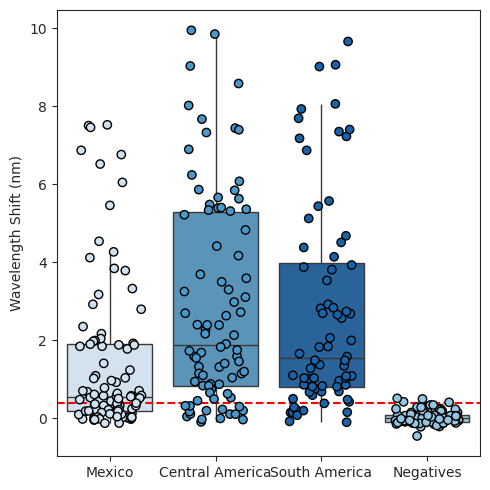

In [11]:
# plot bli data
sns.set_style('ticks')
palette = sns.color_palette("Blues", n_colors=4)
order = ['Mexico', 'Central America', 'South America', 'Negatives']

# draw line for 25th percentile of seropositive samples
line = bli[bli.sero =='Positive'].nm_shift.quantile(0.25)

fig, axes = plt.subplots(1, 1, figsize=(5, 5))

# plot boxplot
ax = sns.boxplot(
    data=bli, 
    x=bli['region'],
    y=bli['nm_shift'], 
    order=order, 
    showcaps=False,
    showfliers=False, 
    palette=palette, 
    linewidth=1,
    hue = bli['region']
    )

    # Set up the stripplot
sns.stripplot(
    data=bli, 
    x=bli['region'],
    y=bli['nm_shift'],
    order=order,
    size=6, 
    palette=palette, 
    edgecolor='black',
    linewidth=1, 
    jitter=0.3,
    hue = bli['region']
    )

ax.axhline(y=line, color='red', linestyle='--')
#ax.set_yscale('log')
 #ax.set_ylim(top=max_value)
ax.set_xlabel("")
ax.set_ylabel("Wavelength Shift (nm)")
#ax.set_title(f"ARC: {peptide_name}")

# Set additional plot parameters
plt.rcParams['axes.linewidth'] = .75

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot
plt.savefig(fig_dir+"fig_5b.pdf", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()